In [2]:
from project_catalog.utils import get_galactic_binary_names
from project_catalog.galactic_binary import GalacticBinary
from project_catalog import compute_1d_hdrs, compute_sky_location_hdr, compute_8d_hdr

from matplotlib import pyplot as plt

import pandas as pd
import numpy as np
from tqdm import tqdm

In [3]:
names = get_galactic_binary_names()

In [4]:
hdrs = pd.read_feather('../data/hdrs.feather')

In [24]:
gb = GalacticBinary.load_feather(names[0])

Loaded LDC0023810973 with 2013 samples and 1 candidates.


In [26]:
print(gb.name)
gb.chain

LDC0023810973


,Frequency,Frequency Derivative,Amplitude,Ecliptic Longitude,coslat,cosinc,Polarization,Initial Phase,SNR,entry match,waveform measure,Ecliptic Latitude,Inclination
0,0.002381,1.742085e-16,4.281694e-23,4.510711,-0.362409,-0.893373,2.543850,3.276237,22.0149,1.000000,0.00000,-0.370851,2.675592
1,0.002381,1.177792e-16,4.002249e-23,4.535321,-0.263697,-0.986101,2.435998,3.166376,22.7694,0.986240,3.57840,-0.266853,2.974671
2,0.002381,1.525075e-16,4.550213e-23,4.532061,-0.306364,-0.734256,0.420127,0.804002,19.7044,0.957742,10.46320,-0.311371,2.395367
3,0.002381,4.192141e-17,4.066120e-23,4.548064,-0.268349,-0.864394,0.501537,0.735321,20.3844,0.953282,11.10790,-0.271679,2.614740
4,0.002381,-1.340443e-17,4.528542e-23,4.538065,-0.299039,-0.780135,2.056082,4.025104,20.6716,0.989289,2.87819,-0.303685,2.465678
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2008,0.002381,4.237396e-17,4.458120e-23,4.566529,-0.212658,-0.895441,1.120462,5.829175,23.1490,0.942388,14.94870,-0.214294,2.680217
2009,0.002381,1.428297e-16,4.816579e-23,4.568023,-0.263505,-0.763124,1.986699,4.077561,21.6026,0.972287,6.60887,-0.266654,2.438930
2010,0.002381,1.284144e-17,5.077059e-23,4.516953,-0.333905,-0.782967,2.854881,2.428992,23.1827,0.991702,2.44969,-0.340443,2.470217
2011,0.002381,-3.514692e-18,5.606788e-23,4.506720,-0.341943,-0.627311,2.138141,3.759822,21.3967,0.982992,4.08684,-0.348984,2.248892


In [23]:
hdrs

,Name,Candidate,SNR,Frequency HDR,Amplitude HDR,Inclination HDR,Initial Phase HDR,Ecliptic Latitude HDR,Ecliptic Longitude HDR,Polarization HDR,Frequency Derivative HDR,8D HDR
0,LDC0023810973,22136087.0,153.770517,0.578293,0.269687,0.346547,0.248262,0.400464,0.880082,0.890101,0.126584,0.758073
1,LDC0041226577,11769726.0,27.754678,0.269313,0.951452,0.960546,0.840589,0.645099,0.017666,0.932543,0.492805,0.955210
2,LDC0030125413,19763412.0,10.124382,0.980377,0.923026,0.996087,0.894143,0.999168,0.998771,0.110675,0.026567,1.000000
3,LDC0030125413,18673125.0,26.663445,0.969964,0.938921,0.248555,0.081928,0.999168,0.998771,0.075361,0.112998,0.960720
4,LDC0030125413,13789765.0,7.128704,0.099171,0.046706,0.996087,0.211862,0.999168,0.998771,0.900764,0.021257,0.998091
...,...,...,...,...,...,...,...,...,...,...,...,...
16319,LDC0070835742,12640258.0,127.119801,0.838250,0.013820,0.848424,0.455050,0.488401,0.830714,0.685199,0.842352,0.584449
16320,LDC0038755124,9858100.0,22.671472,0.204768,0.837874,0.912302,0.701682,0.131568,0.765921,0.059475,0.272711,0.708496
16321,LDC0099544948,23528831.0,380.056965,0.600280,0.664811,0.851363,0.346669,0.430392,0.319513,0.077001,0.527203,0.460276
16322,LDC0041193642,10348494.0,15.646238,0.169283,0.198039,0.362287,0.455495,0.870566,0.272917,0.976914,0.239135,0.999164


In [ ]:
snrs = []
for name in hdrs['Name'].unique():
    # check if there is more than one entry for this name and pick the one with lowest 8D HDR
    # take the SNR value from this entry
    if len(hdrs[hdrs['Name'] == name]) > 1:
        hdr_entry = hdrs[hdrs['Name'] == name].sort_values('8D HDR').iloc[0]
    else:
        hdr_entry = hdrs[hdrs['Name'] == name].iloc[0]
    print(f'Processing {name} with 8D HDR {hdr_entry["8D HDR"]}')
    # load the galactic binary data
    gb = GalacticBinary.load_feather(name)
    # mask = gb.candidates.Name == np.float64(hdr_entry['Candidate'])
    snrs.append((gb.chain.SNR.median(), hdr_entry['SNR']))
    # snrs.append((gb.candidates[mask].SNR.to_numpy(), hdr_entry['SNR']))
snrs = np.array(snrs)


Processing LDC0023810973 with 8D HDR 0.7580725285643318
Loaded LDC0023810973 with 2013 samples and 1 candidates.
Processing LDC0041226577 with 8D HDR 0.9552100255279647
Loaded LDC0041226577 with 4309 samples and 1 candidates.
Processing LDC0030125413 with 8D HDR 0.9607201309328969
Loaded LDC0030125413 with 3666 samples and 3 candidates.
Processing LDC0039987364 with 8D HDR 0.5254553946753854
Loaded LDC0039987364 with 2141 samples and 1 candidates.
Processing LDC0030205330 with 8D HDR 0.9482288828337875
Loaded LDC0030205330 with 3670 samples and 1 candidates.
Processing LDC0036346646 with 8D HDR 1.0
Loaded LDC0036346646 with 2442 samples and 1 candidates.
Processing LDC0032702190 with 8D HDR 0.19887429643527205
Loaded LDC0032702190 with 3198 samples and 1 candidates.
Processing LDC0039519357 with 8D HDR 0.11850311850311851
Loaded LDC0039519357 with 2405 samples and 1 candidates.
Processing LDC0026590928 with 8D HDR 0.9180500105064089
Loaded LDC0026590928 with 4759 samples and 1 candidat

Text(0, 0.5, 'SNR from injections')

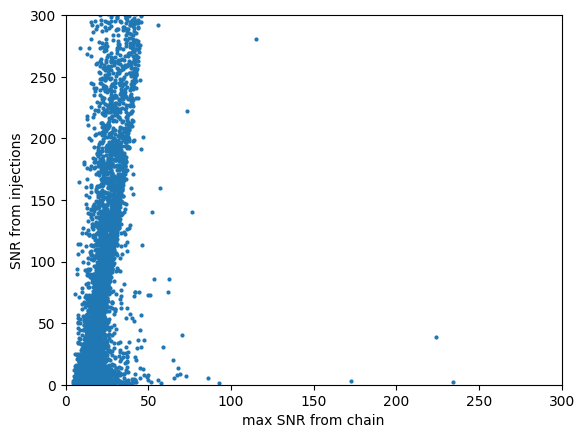

In [30]:
plt.plot(snrs[:, 0], snrs[:, 1], 'o', markersize=2)
plt.ylim(0, 300)
plt.xlim(0, 300)
plt.xlabel('max SNR from chain')
plt.ylabel('SNR from injections')

In [13]:
ucb_params = pd.read_feather('../data/sangria_ucb_params.feather')

In [15]:
ucb_params.SNR.argmax()

np.int64(24871485)

In [31]:
ucb_params.iloc[ucb_params.SNR.argmax()].Name

np.float64(13203719.0)

In [32]:
hdrs[hdrs['Candidate'] == 13203719.0]

,Name,Candidate,SNR,Frequency HDR,Amplitude HDR,Inclination HDR,Initial Phase HDR,Ecliptic Latitude HDR,Ecliptic Longitude HDR,Polarization HDR,Frequency Derivative HDR,8D HDR
10164,LDC0148803813,13203719.0,1.171694e+08,0.083289,0.124864,0.176967,0.141765,0.973359,0.451443,0.673661,0.25211,1.0


In [33]:
gb = GalacticBinary.load_feather('LDC0148803813')

Loaded LDC0148803813 with 4724 samples and 1 candidates.


/Users/aaron/miniconda3/envs/catalogs/lib/python3.13/site-packages/corner/core.py:846: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if xs[k1] is not None:
/Users/aaron/miniconda3/envs/catalogs/lib/python3.13/site-packages/corner/core.py:847: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  axes[k1, k1].axvline(xs[k1], **kwargs)
/Users/aaron/miniconda3/envs/catalogs/lib/python3.13/site-packages/corner/core.py:849: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by positio

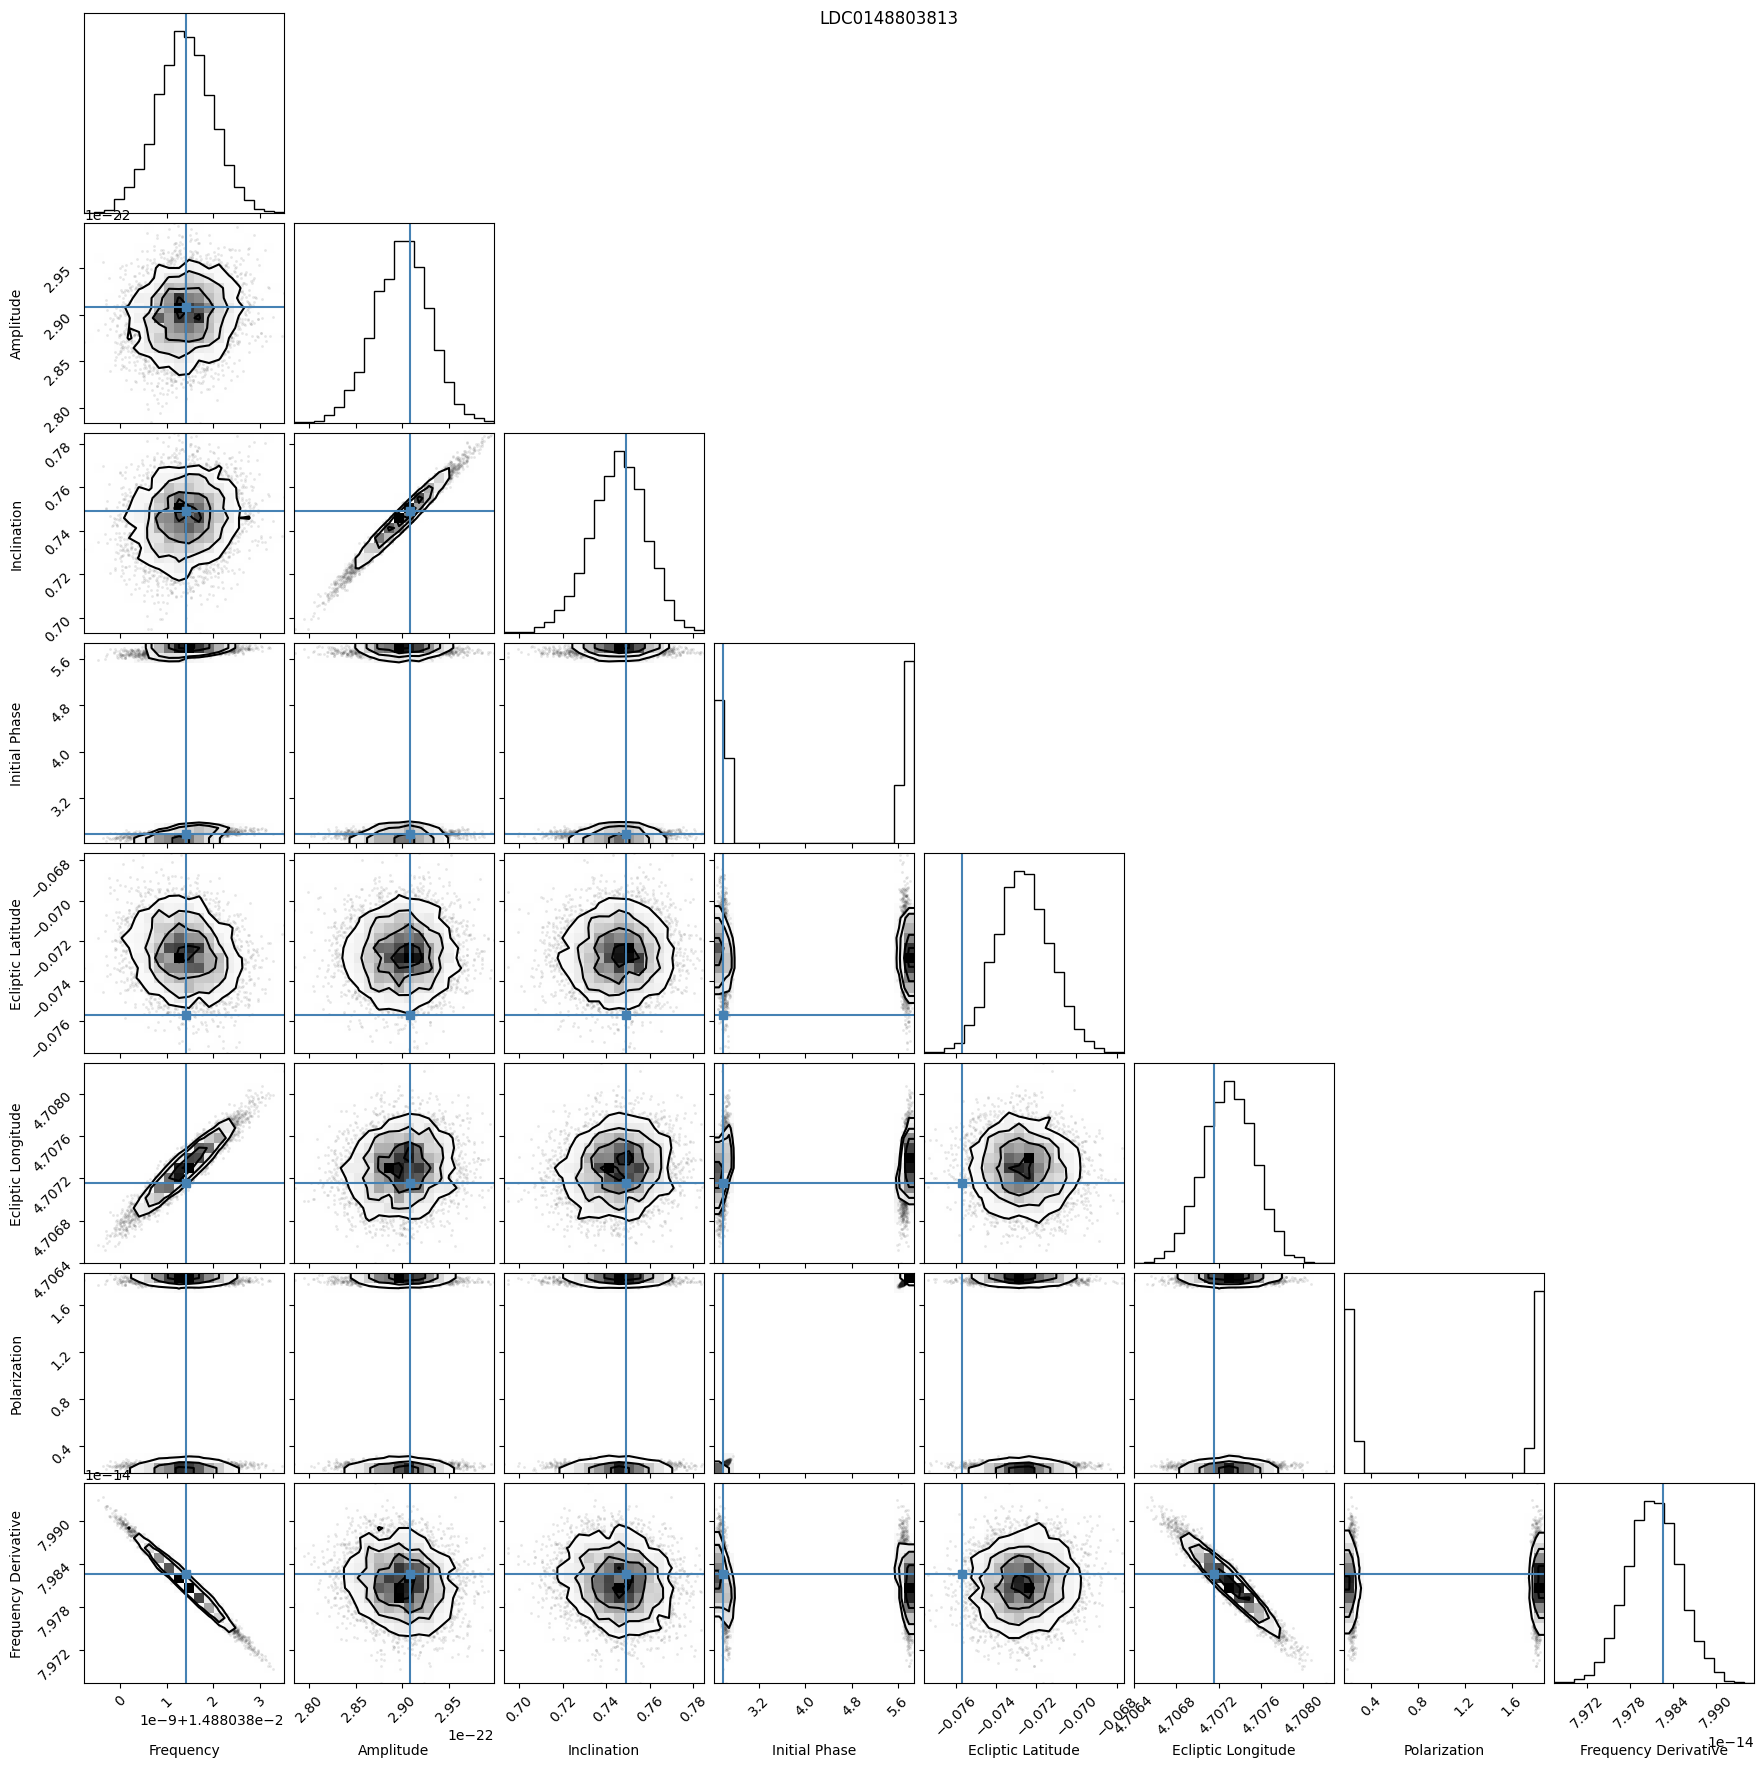

In [35]:
gb.corner_plot(0);

In [36]:
gb.candidates

,Name,Amplitude,Ecliptic Latitude,Ecliptic Longitude,Frequency,Frequency Derivative,Inclination,Initial Phase,Polarization,SNR,Detached
0,13203719.0,2.908133e-22,-0.075671,4.707156,0.01488,7.982541e-14,0.749337,2.576854,3.369205,1.171694e+08,1


In [37]:
gb.chain

,Frequency,Frequency Derivative,Amplitude,Ecliptic Longitude,coslat,cosinc,Polarization,Initial Phase,SNR,entry match,waveform measure,Ecliptic Latitude,Inclination
0,0.01488,7.982411e-14,2.897528e-22,4.707228,-0.075094,0.738236,1.816104,5.748080,258.364,1.000000,0.000000,-0.075165,0.740344
1,0.01488,7.982142e-14,2.930768e-22,4.707206,-0.070005,0.727793,0.228113,2.541705,258.232,0.999968,1.083100,-0.070063,0.755699
2,0.01488,7.988613e-14,2.912041e-22,4.706818,-0.072876,0.731951,0.269348,2.611573,257.855,0.999986,0.519934,-0.072941,0.749615
3,0.01488,7.974095e-14,2.925728e-22,4.707590,-0.073411,0.728984,0.254035,2.661934,258.139,0.999977,0.771298,-0.073477,0.753960
4,0.01488,7.980641e-14,2.907576e-22,4.707360,-0.072486,0.731164,0.253041,2.616067,257.200,0.999989,0.712836,-0.072550,0.750769
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4719,0.01488,7.981918e-14,2.911014e-22,4.707319,-0.073185,0.734098,0.237717,2.580564,258.343,0.999993,0.236966,-0.073251,0.746460
4720,0.01488,7.984389e-14,2.917457e-22,4.707146,-0.072577,0.728921,0.226382,2.544129,257.353,0.999989,0.621323,-0.072640,0.754052
4721,0.01488,7.984375e-14,2.941412e-22,4.707222,-0.071739,0.722954,0.247809,2.581261,257.723,0.999977,0.855748,-0.071800,0.762727
4722,0.01488,7.978999e-14,2.870339e-22,4.707530,-0.072439,0.744560,0.245249,2.610227,257.856,0.999989,0.445795,-0.072503,0.730921
